# Report: Analysis of Bike Rentals

Hassan Rasheed, April 2020

## Executive Summary

This document presents an analysis of data concerning bike rentals in from January 2011 to December 2012. This analysis is based on 17379 observations of hourly bike rental data. Each observation contains information about the day, time, season of the rental reservations.

After exploring the data by calculating summary and descriptive statistics, and by creating visualizations of the data, several critical factors were identified for estimating bike rental rate.

After exploring the data, Linear Regression, Decision Tree Regression and Random Forest Regression models were created to predict the number of bike rentals per hour based on different factors.

After performing the analysis, the author presents the following conclusions:

* The factors with highest correlation to the rental count were:
    * Temperature
    * Hour of the day
    * The season
    * The month
    * Windspeed
    * Whether or not it was a working day
* The model with best performance was a Random Forest regression model using features of _______
* 



## Initial Data Exploration

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from data_science_util import *

In [3]:
hourly_bike_rentals = pd.read_csv("bike_rental_hour.csv")
hourly_bike_rentals.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
summary_stats = pd.DataFrame(hourly_bike_rentals.describe())

### Individual Feature Statistics

In [9]:
summary_stats.T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [ ]:
# Table with summary statistics for each column in the data set

### Correlation and Apparent Relationships

#### Numeric Relationships

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000215079E7B38>]],
      dtype=object)

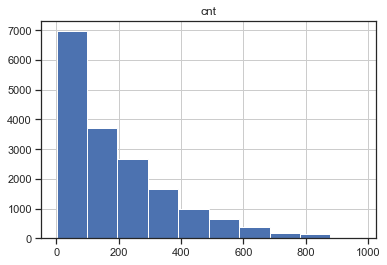

In [11]:
hourly_bike_rentals.hist("cnt")

In [95]:
cnt_corr = hourly_bike_rentals.corr()["cnt"]
print(cnt_corr.sort_values(ascending = False))
highly_correlated_features = list(cnt_corr.sort_values(ascending = False).index)
# We will remove from the feature set columns which are known to be derived from the target column of count
features_to_remove = ['casual','dteday','registered','dteday']
for col in features_to_remove:
    if col in highly_correlated_features:
        highly_correlated_features.remove(col)
print("Regression feature set: "+str(highly_correlated_features))

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64
Regression feature set: ['cnt', 'temp', 'atemp', 'hr', 'instant', 'yr', 'season', 'mnth', 'windspeed', 'workingday', 'weekday', 'holiday', 'weathersit', 'hum']


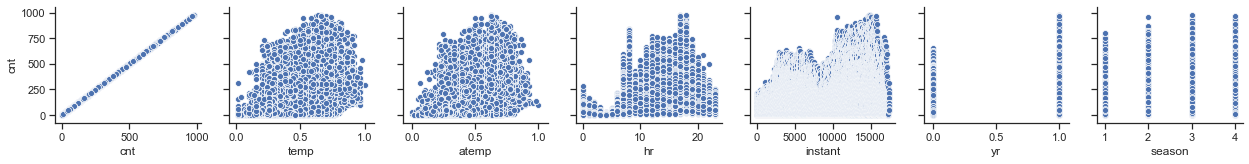

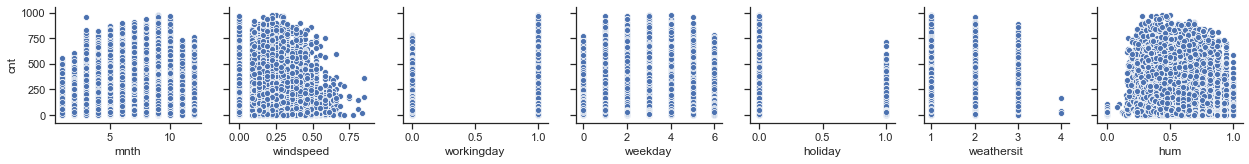

In [96]:
# Scatter plot matrix showing relationship between important factors and the target column
import seaborn as sns

sns.set(style="ticks")

sns.pairplot(data=hourly_bike_rentals, y_vars=['cnt'], x_vars=highly_correlated_features[:7])
sns.pairplot(data=hourly_bike_rentals, y_vars=['cnt'], x_vars=highly_correlated_features[7:])

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(hourly_bike_rentals[highly_correlated_features], figsize=(12, 8))

The correlation matrix shows that there are no features strongly correlated with the target feature. In addition, pairwise scatter plots also show no distinct linear relationships between the critical features and the rental count.

**This likely means that Linear regression will be ineffective on this data set**, given that it assumes a linear relationship between the features and the target variable.

## Regression

To confirm our suspicion about linear regression, we first create a linear regression model and assess the error.

The model was trained with 80% of the data, and tested with the remaining 20%.

In [97]:
def print_metrics(y_true, y_predicted, n_parameters, verbose=False):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    mse = sklm.mean_squared_error(y_true, y_predicted)
    rmse = math.sqrt(sklm.mean_squared_error(y_true, y_predicted))
    mae = sklm.mean_absolute_error(y_true, y_predicted)
    medar = sklm.median_absolute_error(y_true, y_predicted)

    ## Print the usual metrics and the R^2 values
    if verbose:
        print('Mean Square Error      = ' + str( mse ))
        print('Root Mean Square Error = ' + str( rmse ))
        print('Mean Absolute Error    = ' + str( mae ))
        print('Median Absolute Error  = ' + str( medar ))
        print('R^2                    = ' + str(r2))
        print('Adjusted R^2           = ' + str(r2_adj))
    # return {"mean_square_error":mse,"root_mean_square_error":rmse,"mean_absolute_error":mae,"median_absolute_error":medar,"r^2":r2,"adj_r2":r2_adj}
    return [mse,rmse,mae,medar,r2,r2_adj]

In [98]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(hourly_bike_rentals[highly_correlated_features], test_size=0.2, random_state=42)
#train_predictions = train_set['cnt']
#train_set.drop(['cnt'],axis='columns',inplace=True)
#test_predictions = test_set['cnt']
#test_set.drop(['cnt'],axis='columns',inplace=True)

In [99]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_set[['temp','hr']], train_predictions)

y_predicted = lin_reg.predict(test_set[['temp','hr']])

y_true = test_predictions.to_numpy()

mse = sklm.mean_squared_error(y_true, y_predicted)
rmse = math.sqrt(sklm.mean_squared_error(y_true, y_predicted))
r2 = sklm.r2_score(y_true, y_predicted)

In [100]:
print(rmse)
print(r2)

149.7012582005348
0.29227299564487963


In [101]:
all_features = ['temp', 'atemp', 'hr', 'instant', 'yr', 'season', 'mnth', 'windspeed', 'workingday', 'weekday', 'holiday', 'weathersit', 'hum']

lin_reg2 = LinearRegression()
lin_reg2.fit(train_set[all_features], train_set['cnt'])

y_predicted = lin_reg2.predict(test_set[all_features])

y_true = test_predictions.to_numpy()

mse = sklm.mean_squared_error(y_true, y_predicted)
rmse = math.sqrt(sklm.mean_squared_error(y_true, y_predicted))
r2 = sklm.r2_score(y_true, y_predicted)
print(rmse)
print(r2)

139.20112343997783
0.38807197035703567


In [102]:
train_set.head()

,cnt,temp,atemp,hr,instant,yr,season,mnth,windspeed,workingday,weekday,holiday,weathersit,hum
335,72,0.20,0.1970,11,336,0,1,1,0.2239,0,6,0,1,0.55
7035,518,0.52,0.5000,18,7036,0,4,10,0.1045,1,2,0,1,0.42
8051,3,0.46,0.4545,3,8052,0,4,12,0.2239,1,3,0,3,1.00
2133,172,0.46,0.4545,18,2134,0,2,4,0.0000,0,0,0,2,0.31
8485,1,0.20,0.2273,6,8486,0,1,12,0.1045,0,0,0,1,0.75


In [103]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

feature_pipeline = Pipeline([
        ('std_scaler', MinMaxScaler())
    ])

train_set_prepared = pd.DataFrame(feature_pipeline.fit_transform(train_set))
test_set_prepared = pd.DataFrame(feature_pipeline.fit_transform(test_set))

In [104]:
lin_reg3 = LinearRegression()
lin_reg3.fit(train_set_prepared.iloc[:,1:], train_set_prepared[0])

y_predicted = lin_reg3.predict(test_set_prepared.iloc[:,1:])

y_true = test_set_prepared[0].to_numpy()

mse = sklm.mean_squared_error(y_true, y_predicted)
rmse = math.sqrt(sklm.mean_squared_error(y_true, y_predicted))
r2 = sklm.r2_score(y_true, y_predicted)
print(rmse)
print(r2)

0.1426844585994029
0.38755394037909197


After trying adding features and scaling to improve the Linear Regression model, we have confirmed our initial hypothesis that the data itself is not accurately modeled with linear regression due to the absence of linearity between the features and the target variable.

In [105]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg3, train_set_prepared.iloc[:,1:], train_set_prepared[0],
                         scoring="r2", cv=10)
#tree_rmse_scores = np.sqrt(-scores)
print(scores)

[0.37137661 0.42540365 0.35944653 0.37307376 0.3746956  0.40866166
 0.39398848 0.37423343 0.38943534 0.40345836]


In [108]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(train_set_prepared.iloc[:,1:], train_set_prepared[0])

y_predicted_dtr = dtr.predict(test_set_prepared.iloc[:,1:])

y_true = test_set_prepared[0].to_numpy()

mse_dtr = sklm.mean_squared_error(y_true, y_predicted)
rmse_dtr = math.sqrt(sklm.mean_squared_error(y_true, y_predicted_dtr))
r2_dtr = sklm.r2_score(y_true, y_predicted_dtr)
print(rmse_dtr)
print(r2_dtr)

0.06131351291442175
0.8869092979059056


In [109]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(train_set_prepared.iloc[:,1:], train_set_prepared[0])

y_predicted_rfr = rfr.predict(test_set_prepared.iloc[:,1:])

y_true = test_set_prepared[0].to_numpy()

mse_rfr = sklm.mean_squared_error(y_true, y_predicted_rfr)
rmse_rfr = math.sqrt(sklm.mean_squared_error(y_true, y_predicted_rfr))
r2_rfr = sklm.r2_score(y_true, y_predicted_rfr)
print(rmse_rfr)
print(r2_rfr)

C:\Users\hrasheed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.04568605668393096
0.9372112481574129
